In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  0


In [13]:
# Data Augmentation
IMAGE_GEN = ImageDataGenerator(
        rescale = 1/255,
        rotation_range = 10,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        zoom_range = 0.2,
        validation_split = 0.2
)

In [14]:
os.chdir("C:\\Users\\MONSTER\\Desktop\\imgProcessing")

In [15]:
BATCHES = [16, 32, 64, 128, 256, 512]

TRAIN = IMAGE_GEN.flow_from_directory(
    batch_size = BATCHES[0],
    directory = "C:\\Users\\MONSTER\\Desktop\\imgProcessing\\Dataset",
    shuffle = True,
    target_size = (224, 224),
    subset = "training",
    class_mode = "categorical",
    seed = 42
)

VAL = IMAGE_GEN.flow_from_directory(
    batch_size = BATCHES[0],
    directory = "C:\\Users\\MONSTER\\Desktop\\imgProcessing\\Dataset",
    shuffle = True,
    target_size = (224, 224),
    subset = "validation",
    class_mode = "categorical",
    seed = 42
)

Found 1115 images belonging to 3 classes.
Found 278 images belonging to 3 classes.


In [16]:
IMAGE_GEN_TRAIN.fit(
    TRAIN,
    augment = True,
    seed = 42
)

MemoryError: Unable to allocate 18.4 MiB for an array with shape (32, 224, 224, 3) and data type float32

In [ ]:
# Model Building
INPUT_SHAPE = (224, 224, 3)
ACTIVATION = "relu"

VGG16 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation = ACTIVATION, input_shape = INPUT_SHAPE),
    layers.Conv2D(32, (3, 3), activation = ACTIVATION),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = ACTIVATION),
    layers.Conv2D(64, (3, 3), activation = ACTIVATION),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = ACTIVATION),
    layers.Conv2D(128, (3, 3), activation = ACTIVATION),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation = ACTIVATION),
    layers.Conv2D(256, (3, 3), activation = ACTIVATION),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation = ACTIVATION),
    layers.Conv2D(256, (3, 3), activation = ACTIVATION),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation = ACTIVATION),
    layers.Dense(250, activation = ACTIVATION),
    layers.Dropout(0.5, seed = 42),
    layers.Dense(3, activation = "softmax")
])

VGG16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                 

In [ ]:
# Compiling & Hyperparameter Tuning
LR = [0.001, 0.01, 0.1, 1]
OPTIMIZER = keras.optimizers.Adam(learning_rate = LR[0])

metrics = [
    tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.RootMeanSquaredError(),
    tf.keras.metrics.MeanSquaredError()
]

VGG16.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = metrics
)
VGG16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                 

In [ ]:
# Model Training
EPOCHS = [50, 100, 150, 200, 250]

HISTORY = VGG16.fit(
    TRAIN,
    batch_size = BATCHES[0],
    epochs = EPOCHS[0],
    validation_data = VAL,
    verbose = 1,
    shuffle = True
)

In [ ]:
VGG16.save(os.getcwd() + "\\Models\\VGG16.h5")

In [ ]:
VGG16 = keras.models.load_model(os.getcwd() + "\\Models\\VGG16.h5")

In [ ]:
HISTORY.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'auc', 'root_mean_squared_error', 'mean_squared_error', 'val_loss', 'val_categorical_accuracy', 'val_auc', 'val_root_mean_squared_error', 'val_mean_squared_error'])

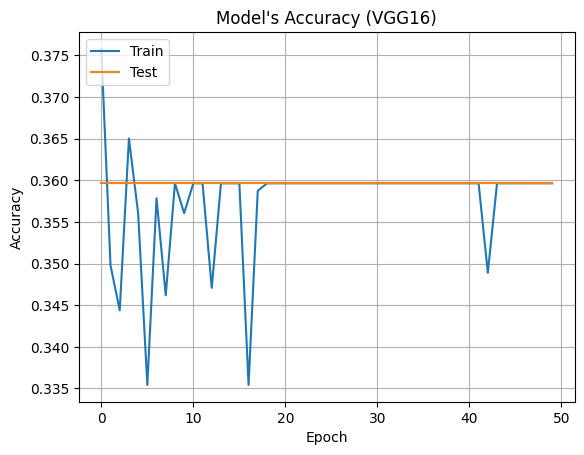

In [ ]:
# Accuracy Plot
plt.plot(HISTORY.history["categorical_accuracy"])
plt.plot(HISTORY.history["val_categorical_accuracy"])
plt.title("Model\'s Accuracy (VGG16)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

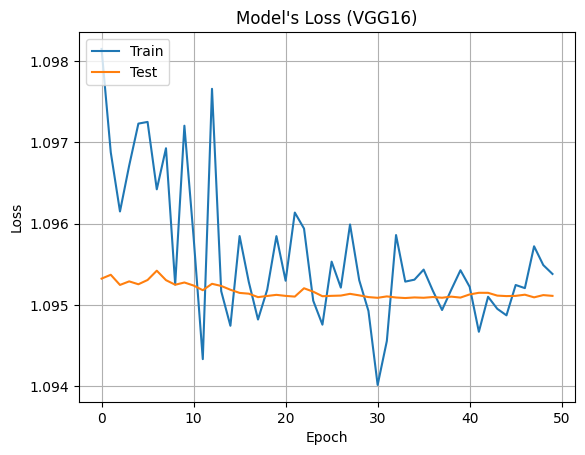

In [ ]:
# Loss Plot
plt.plot(HISTORY.history["loss"])
plt.plot(HISTORY.history["val_loss"])
plt.title("Model\'s Loss (VGG16)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.grid()
plt.show()

9/9 [==============================] - 4s 483ms/step


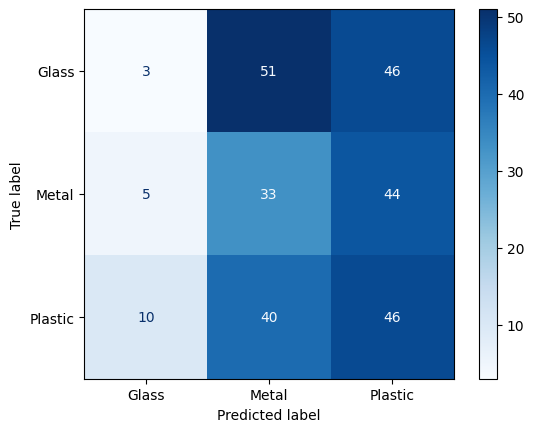

In [234]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_PRED = VGG16.predict(VAL)
Y_PRED = np.argmax(Y_PRED, axis = 1)

Y_TRUE = VAL.classes
LABELS = list(VAL.class_indices.keys())

CM = confusion_matrix(Y_TRUE, Y_PRED)
CMD = ConfusionMatrixDisplay(CM, display_labels = LABELS)
CMD.plot(cmap = plt.cm.Blues)
plt.show()

In [239]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_TRUE, Y_PRED, target_names = LABELS))

              precision    recall  f1-score   support

       Glass       0.17      0.03      0.05       100
       Metal       0.27      0.40      0.32        82
     Plastic       0.34      0.48      0.40        96

    accuracy                           0.29       278
   macro avg       0.26      0.30      0.26       278
weighted avg       0.26      0.29      0.25       278



9/9 [==============================] - 4s 443ms/step


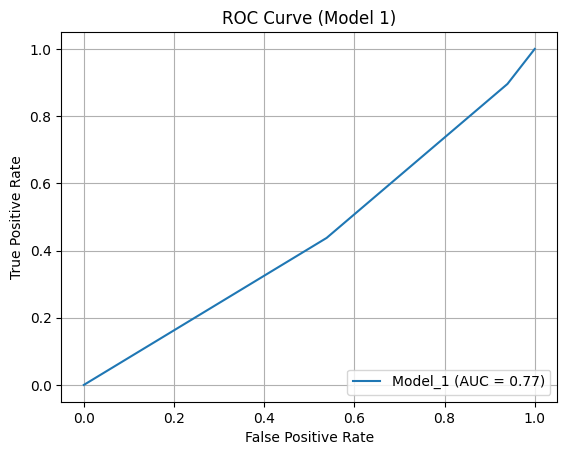

In [244]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

FPR, TPR, THRESHOLD = roc_curve(Y_TRUE, Y_PRED, pos_label = 2)
ROC = RocCurveDisplay(fpr = FPR, tpr = TPR, roc_auc = AUC, estimator_name = "Model_1")
ROC.plot()
plt.title("ROC Curve (Model 1)")
plt.grid()
plt.show()